In [1]:
import networkx as nx # for handling graphs/networks 
import numpy as np # for basic scientific computing 
import matplotlib.pyplot as plt # for plotting

In [2]:
# plug in baseline graph gives you random orientation of edges and gives you randomly directed graph
def random_orientation(G): 
    # G is undirected. Flip fair coins for each edge of G to get initial orientation.
    G_di = nx.DiGraph() 
    for e in G.edges():
        U = np.random.rand()
        if U < 1/2: 
            G_di.add_edge(e[0],e[1])
        else:
            G_di.add_edge(e[1],e[0])
    return G_di

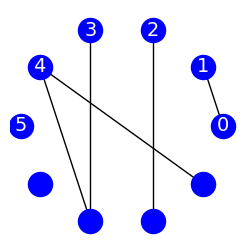

In [3]:
G = nx.erdos_renyi_graph(n=10,p=0.1)

fig = plt.figure(figsize=[3,3], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(G, ax=ax, pos=nx.circular_layout(G), labels={i: i for i in range(6)},
                 node_size=300, node_color="blue", font_size=14, font_color="white")
plt.axis('off');

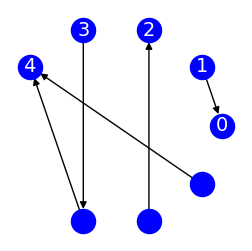

In [4]:
G_di = random_orientation(G)

fig = plt.figure(figsize=[3,3], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(G_di, ax=ax, pos=nx.circular_layout(G), labels={i: i for i in range(6)},
                 node_size=300, node_color="blue", font_size=14, font_color="white")
plt.axis('off');

In [14]:
def WS(G, p=0.1, random_orientation=False):
    # Watts-Strogatz model with baseline graph G and edge rewiring probability p 
    # G is undirected. Flip fair coins for each edge of G to get initial orientation.
    # For each oriented edge, resample the head node uniformly at random with probability p, independently. 
    # Do nothing for that edge with probability 1-p. 
    
    # Give random orientation by crea
    if random_orientation: 
        G1 = random_orientation(G)
    else: #G is already a digraph 
        G1 = G

    nodes = list(G1.nodes())
    G2 = nx.Graph()
    
    for e in G1.edges():
        U = np.random.rand() #random # betweeon 0-1
        if U < p: #rewiring only with probability p
            i= np.random.choice(np.arange(len(nodes)))
            v = nodes[i] #np.random.choice(nodes) # choose a random node v
            G2.add_edge(e[0], v) # add a rewired edge (e[0], v) to G2  #from networkx add_edge()
        else: 
            G2.add_edge(e[0], e[1]) # add the original edge (e[0], e[1]) to G2
    return G2
    

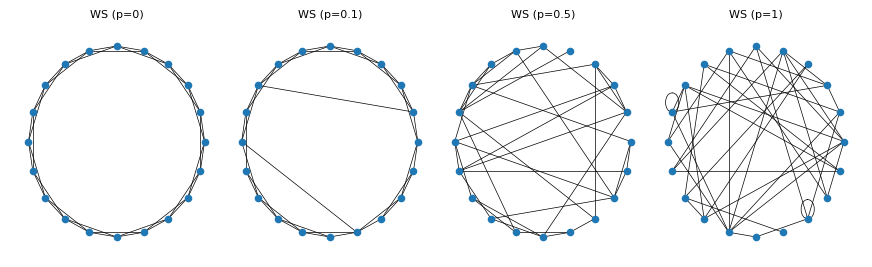

In [15]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=[11,3], constrained_layout=False)
network_list = [""]
p_list=[0, 0.1, 0.5, 1]
outer_grid = gridspec.GridSpec(nrows=1, ncols=len(p_list), wspace=0, hspace=0)

G0 = nx.circulant_graph(20, [1,2])
G1 = random_orientation(G0)
pos = nx.circular_layout(G0)
clustering_list = [] 
path_length_list = []

for i in np.arange(len(p_list)): 
    G = WS(G1, p=p_list[i], random_orientation=False)
    degrees = [G.degree(n) for n in G.nodes()]
    clustering_list.append(nx.average_clustering(G))
    path_length_list.append(nx.average_shortest_path_length(G))
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    weights = [0.5 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=pos)
    #ax.legend()
    ax.set_title("WS (p={})".format(p_list[i]), fontsize=8)

plt.savefig("WS_graph")

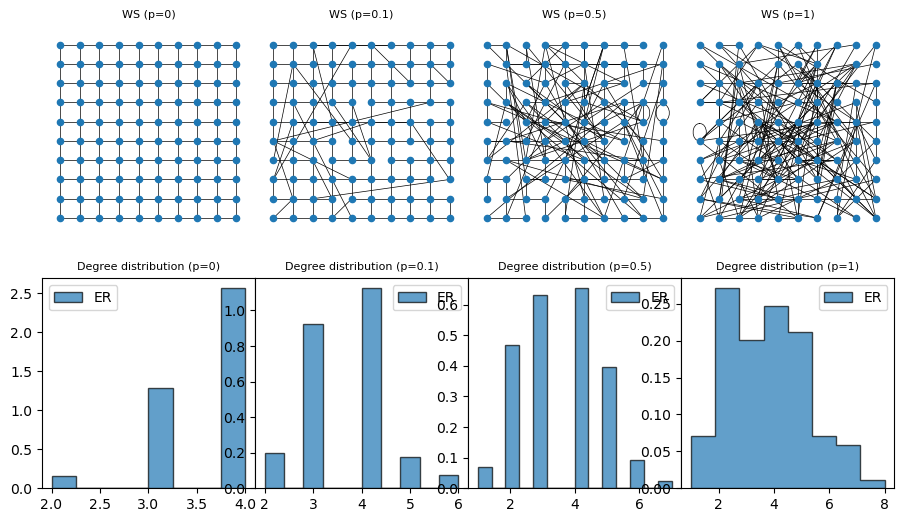

In [16]:
fig = plt.figure(figsize=[11,6], constrained_layout=False)
network_list = [""]
p_list=[0, 0.1, 0.5, 1]
outer_grid = gridspec.GridSpec(nrows=2, ncols=len(p_list), wspace=0, hspace=0.2)

G0 = nx.grid_2d_graph(10,10)
G1 = random_orientation(G0)
#pos = nx.spectral_layout(G0)
pos = {(x,y):(y,-x) for x,y in G0.nodes()}
clustering_list = [] 
path_length_list = []

for i in np.arange(len(p_list)): 
    G = WS(G1, p=p_list[i], random_orientation=False)
    degrees = [G.degree(n) for n in G.nodes()]
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    weights = [0.5 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=pos)
    #ax.legend()
    ax.set_title("WS (p={})".format(p_list[i]), fontsize=8)

    
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.hist(degrees, bins='auto', alpha=0.7, label='ER', edgecolor="k", histtype='stepfilled', density=True)
    ax.legend()
    ax.set_title("Degree distribution (p={})".format(p_list[i]), fontsize=8)


plt.savefig("WS_graph_lattice_deg", bbox_inches="tight")

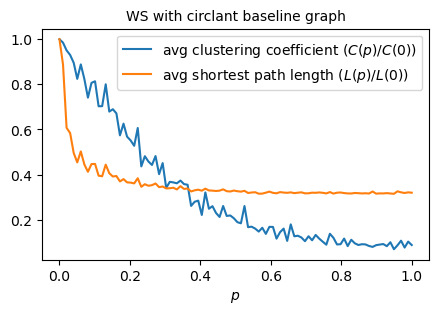

In [18]:
#average cluster coeff & forrest path
fig = plt.figure(figsize=[5,3], constrained_layout=False)
network_list = [""]
p_list=np.linspace(0, 1, 100, endpoint=True)
outer_grid = gridspec.GridSpec(nrows=1, ncols=1, wspace=0, hspace=0)
inner_grid = outer_grid[0,0].subgridspec(1, 1, wspace=0, hspace=0)
ax = fig.add_subplot(inner_grid[0, 0])

G0 = nx.circulant_graph(100, [1,2,3])
G1 = random_orientation(G0)
pos = nx.circular_layout(G0)
clustering_list = [] 
path_length_list = []

for i in np.arange(len(p_list)): 
    G = WS(G1, p=p_list[i], random_orientation=False)
    #degrees = [G.degree(n) for n in G.nodes()]
    clustering_list.append(nx.average_clustering(G))
    if nx.is_connected(G):
        path_length_list.append(nx.average_shortest_path_length(G))
    else:
        path_length_list.append(0)
    
clustering_list = np.asarray(clustering_list)/clustering_list[0]    
path_length_list = np.asarray(path_length_list)/path_length_list[0]
    
ax.plot(p_list, clustering_list, label=r"avg clustering coefficient ($C(p)/C(0)$)")
ax.plot(p_list, path_length_list, label=r"avg shortest path length ($L(p)/L(0)$)")
#ax.set_xscale('log')
ax.set_title("WS with circlant baseline graph", fontsize=10)
ax.set_xlabel(r"$p$")
ax.legend()

 

plt.savefig("WS_cl_pl")

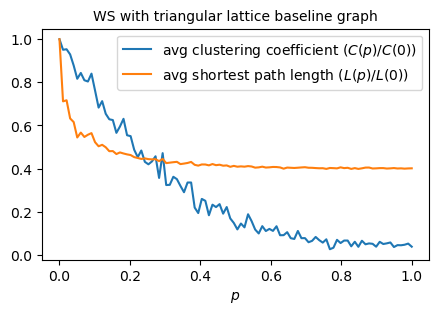

In [19]:
fig = plt.figure(figsize=[5,3], constrained_layout=False)
network_list = [""]
p_list=np.linspace(0, 1, 100, endpoint=True)
outer_grid = gridspec.GridSpec(nrows=1, ncols=1, wspace=0, hspace=0)
inner_grid = outer_grid[0,0].subgridspec(1, 1, wspace=0, hspace=0)
ax = fig.add_subplot(inner_grid[0, 0])

#G0 = nx.grid_2d_graph(10,10)
G0 = nx.triangular_lattice_graph(20, 20)
G1 = random_orientation(G0)
pos = nx.circular_layout(G0)
clustering_list = [] 
path_length_list = []

for i in np.arange(len(p_list)): 
    G = WS(G1, p=p_list[i], random_orientation=False)
    #degrees = [G.degree(n) for n in G.nodes()]
    clustering_list.append(nx.average_clustering(G))
    if nx.is_connected(G):
        path_length_list.append(nx.average_shortest_path_length(G))
    else:
        path_length_list.append(0)
    
clustering_list = np.asarray(clustering_list)/clustering_list[0]    
path_length_list = np.asarray(path_length_list)/path_length_list[0]
    
ax.plot(p_list, clustering_list, label=r"avg clustering coefficient ($C(p)/C(0)$)")
ax.plot(p_list, path_length_list, label=r"avg shortest path length ($L(p)/L(0)$)")
#ax.set_xscale('log')
ax.set_title("WS with triangular lattice baseline graph", fontsize=10)
ax.set_xlabel(r"$p$")
ax.legend()

 

plt.savefig("WS_cl_pl_triangular")